# Political graphs

Draw graphs for frequencies of mentions of political parties and political leaders in Dutch tweets.

In [42]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import re

In [12]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Read data

In [4]:
DATADIR = "../data/"
DATAFILEPARTIES = DATADIR+"political-parties.csv"
DATAFILELEADERS = DATADIR+"political-leaders.csv"
DATEFORMAT = "%Y%m"
LEADER = "leader"
PARTY = "party"

In [3]:
parties = pd.read_csv(DATAFILEPARTIES)
leaders = pd.read_csv(DATAFILELEADERS)

## Add totals and sort

In [34]:
DATEPATTERN = "20200[2-7]"
TOTAL = "total"

def sortDf(df):
    totals = []
    for i in range(0,len(df)):
        totals.append(sum([df.iloc[i][column] for column in df.iloc[i].index if re.search(DATEPATTERN,str(column))]))
    df[TOTAL] = totals
    return(df.sort_values(by=[TOTAL],ascending=False))

In [ ]:
parties = sortDf(parties)
leaders = sortDf(leaders)

## Visualize

In [56]:
PLURAL= {PARTY:"parties",LEADER:"leaders"}

def visualizeDf(df,n=5,labelColumn="unknown"):
    fig,ax = plt.subplots(figsize=(10,5))
    for i in range(0,n):
        x = [datetime.datetime.strptime(column,DATEFORMAT) for column in df.iloc[i].index if re.search(DATEPATTERN,str(column))]
        y = [df.iloc[i][column] for column in df.iloc[i].index if re.search(DATEPATTERN,str(column))]
        plt.plot_date(x,y,fmt="-",label=df.iloc[i][labelColumn])
    plt.legend()
    plt.xlabel("day/month")
    plt.ylabel("count")
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%-d/%-m"))
    plt.title(f"Frequencies per month on Dutch Twitter of top {n} most frequently mentioned political {PLURAL[labelColumn]}")
    plt.show()

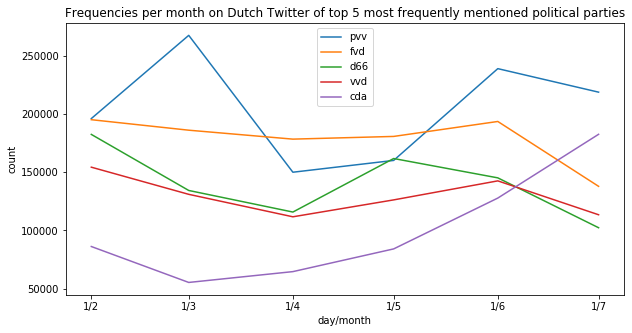

In [57]:
visualizeDf(parties,labelColumn=PARTY)

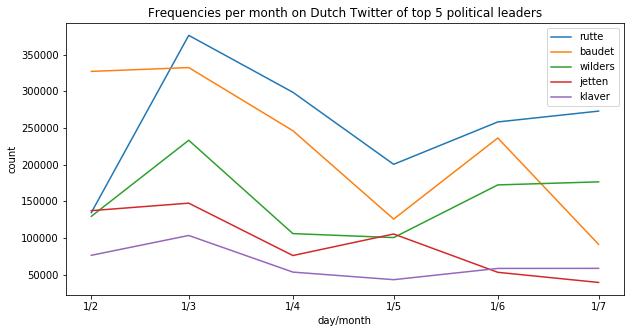

In [55]:
visualizeDf(leaders,labelColumn=LEADER)

Results of 2017 parliament elections:

1. 21% VVD (Rutte)
2. 13% PVV (Wilders)
3. 12% CDA (De Jong)
4. 12% D66 (Jetten)
5. 9% GroenLinks (Klaver)
6. 9% SP (Marijnissen)
7. 6% PvdA (Asscher)
8. 3% ChristenUnie (Segers)
9. 3% PvdD (Ouwehand)
10. 3% 50Plus (Krol)
11. 2% SGP (Van der Staaij)
12. 2% DENK (Azarkan)
13. 2% FvD (Baudet)